# 1.DATASET & LIBRARIES

## 1.1 Dataset

Table : 80 Cereals

Check here : https://docs.google.com/spreadsheets/d/e/2PACX-1vQG0yfKNk9xgOv7V_F0mUWzNv41aqVipCZ3DxWMYtwQMpyMPIRaonF82bzL4GEe_xia8UJAitBkgyY3/pub?output=csv

The dataset is from Kaggle https://www.kaggle.com/datasets/crawford/80-cereals. This dataset contains information about 80 different cereal products from 7 manufacturers. Manufacturers include American Home Food Products, General Mills, Kellogs, Nabisco, Post, Quaker Oats, and Ralston Purina. This analysis will provide understanding of what goes in the cereal that we eat everyday for breakfast.


Variables in the dataset :

**Name** : Name of cereal

**mfr** : Manufacturer of cereal

A = American Home Food Products
G = General Mills
K = Kelloggs
N = Nabisco
P = Post
Q = Quaker Oats
R = Ralston Purina


**type** :
cold
hot

**calories** : calories per serving

**protein** : grams of protein

**fat** : grams of fat

**sodium** : milligrams of sodium

**fiber** : grams of dietary fiber

**carbo** : grams of complex carbohydrates

**sugars** : grams of sugars

**potass** : milligrams of potassium

**vitamins** : vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

**shelf** : display shelf (1, 2, or 3, counting from the floor)

**weight** : weight in ounces of one serving

**cups** : number of cups in one serving

**rating** : a rating of the cereals (Possibly from Consumer Reports?)

## 1.2 Libraries


In [1]:
# Importing Libraries
import pandas as pd
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# URL Google Sheets CSV
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQG0yfKNk9xgOv7V_F0mUWzNv41aqVipCZ3DxWMYtwQMpyMPIRaonF82bzL4GEe_xia8UJAitBkgyY3/pub?output=csv"

df = pd.read_csv(url)
print(df.head())  # Show firts 5 rows

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [3]:
df.shape

(77, 16)

Thre are 77 rows by 16 columns

In [4]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [5]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1nl5b__ZOfdbSJw9U_JvI_1caArkdJlOpUDTADOAfHP0#gid=0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


There are 0 rows of null data

In [7]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
df.describe(include='all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


In [9]:
str(df)

'                         name mfr type  calories  protein  fat  sodium  fiber  \\\n0                   100% Bran   N    C        70        4    1     130   10.0   \n1           100% Natural Bran   Q    C       120        3    5      15    2.0   \n2                    All-Bran   K    C        70        4    1     260    9.0   \n3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   \n4              Almond Delight   R    C       110        2    2     200    1.0   \n..                        ...  ..  ...       ...      ...  ...     ...    ...   \n72                    Triples   G    C       110        2    1     250    0.0   \n73                       Trix   G    C       110        1    1     140    0.0   \n74                 Wheat Chex   R    C       100        3    1     230    3.0   \n75                   Wheaties   G    C       100        3    1     200    3.0   \n76        Wheaties Honey Gold   G    C       110        2    1     200    1.0   \n\n    carbo  s

# 2.DATA CLEANING

## 2.1 Check Typo Value

In [10]:
# Column "name"
print("Typos in column 'name':")
for value in df['name']:
    if not re.match(r'^[A-Za-z\s]+$', value):
        print(value)

Typos in column 'name':
100% Bran
100% Natural Bran
All-Bran
All-Bran with Extra Fiber
Basic 4
Cap'n'Crunch
Cracklin' Oat Bran
Cream of Wheat (Quick)
Crispy Wheat & Raisins
Frosted Mini-Wheats
Fruit & Fibre Dates; Walnuts; and Oats
Grape-Nuts
Honey-comb
Just Right Fruit & Nut
Muesli Raisins; Dates; & Almonds
Muesli Raisins; Peaches; & Pecans
Multi-Grain Cheerios
Nut&Honey Crunch
Nutri-Grain Almond-Raisin
Nutri-grain Wheat
Post Nat. Raisin Bran
Product 19
Shredded Wheat 'n'Bran


There is no typo values

## 2.2 Check Missing Values

In [11]:
# Perecentage of null data of each column
round(df.isnull().sum()/len(df*100),2)

,0
name,0.0
mfr,0.0
type,0.0
calories,0.0
protein,0.0
fat,0.0
sodium,0.0
fiber,0.0
carbo,0.0
sugars,0.0


There is no null data

<Axes: >

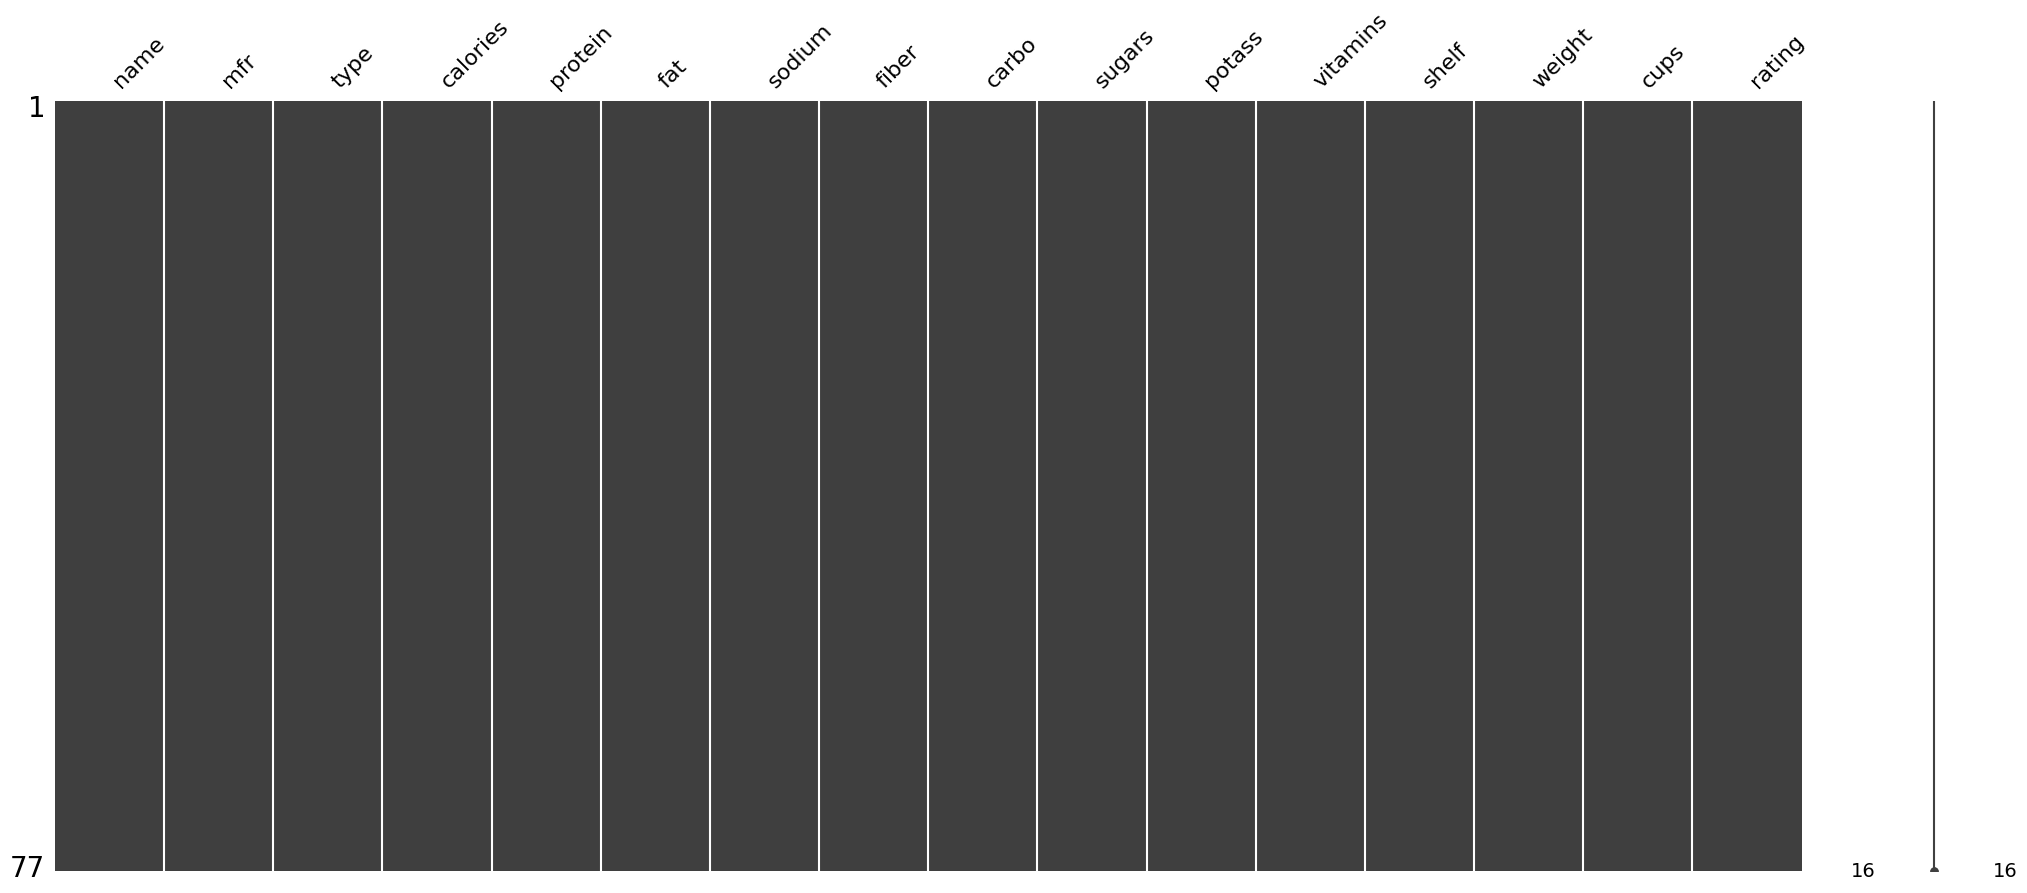

In [12]:
# Missing data
msno.matrix(df)

There is no missing data

## 2.3 Check Duplicate Values

In [13]:
# Looking for duplicated data
print("Number of duplicated data:", df.duplicated().sum())

Number of duplicated data: 0


There is no duplicate data in each row and column.

## 2.4 Check Unique Values

In [14]:
# Check the number of unique values ​​in each column
print("the number of unique values ​​in each column:")
print(df.nunique())

the number of unique values ​​in each column:
name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64


In [15]:
# Check the number of unique values ​​in each column
print("\the number of unique values ​​in each column:")
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].unique())

	he number of unique values ​​in each column:

name:
['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oa

## 2.5 Transform Data Type

In [16]:
# Change the 'mfr' and 'type' columns to categories
df['mfr'] = df['mfr'].astype('category')
df['type'] = df['type'].astype('category')

# Recode values ​​in column 'mfr'
df['mfr'] = df['mfr'].replace({
    "A": "American Home Food Products",
    "G": "General Mills",
    "K": "Kelloggs",
    "N": "Nabisco",
    "P": "Post",
    "Q": "Quaker Oats",
    "R": "Ralston Purnia"
})

# Recode value in 'type' column
df['type'] = df['type'].replace({
    "C": "Cold",
    "H": "Hot"
})

print(df.head())

                        name             mfr  type  calories  protein  fat  \
0                  100% Bran         Nabisco  Cold        70        4    1   
1          100% Natural Bran     Quaker Oats  Cold       120        3    5   
2                   All-Bran        Kelloggs  Cold        70        4    1   
3  All-Bran with Extra Fiber        Kelloggs  Cold        50        4    0   
4             Almond Delight  Ralston Purnia  Cold       110        2    2   

   sodium  fiber  carbo  sugars  potass  vitamins  shelf  weight  cups  \
0     130   10.0    5.0       6     280        25      3     1.0  0.33   
1      15    2.0    8.0       8     135         0      3     1.0  1.00   
2     260    9.0    7.0       5     320        25      3     1.0  0.33   
3     140   14.0    8.0       0     330        25      3     1.0  0.50   
4     200    1.0   14.0       8      -1        25      3     1.0  0.75   

      rating  
0  68.402973  
1  33.983679  
2  59.425505  
3  93.704912  
4  34.38484

<ipython-input-16-ce832827333b>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['mfr'] = df['mfr'].replace({
<ipython-input-16-ce832827333b>:17: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['type'] = df['type'].replace({


In [17]:
# Displaying unique categories (levels) in the 'mfr' column
print(df['mfr'].unique())

['Nabisco', 'Quaker Oats', 'Kelloggs', 'Ralston Purnia', 'General Mills', 'Post', 'American Home Food Products']
Categories (7, object): ['American Home Food Products', 'General Mills', 'Kelloggs', 'Nabisco', 'Post', 'Quaker Oats',
                         'Ralston Purnia']


# 3.EXPLORE DATA ANALYSIS

## 3.1 Correlation Heatmap of Numeric Column

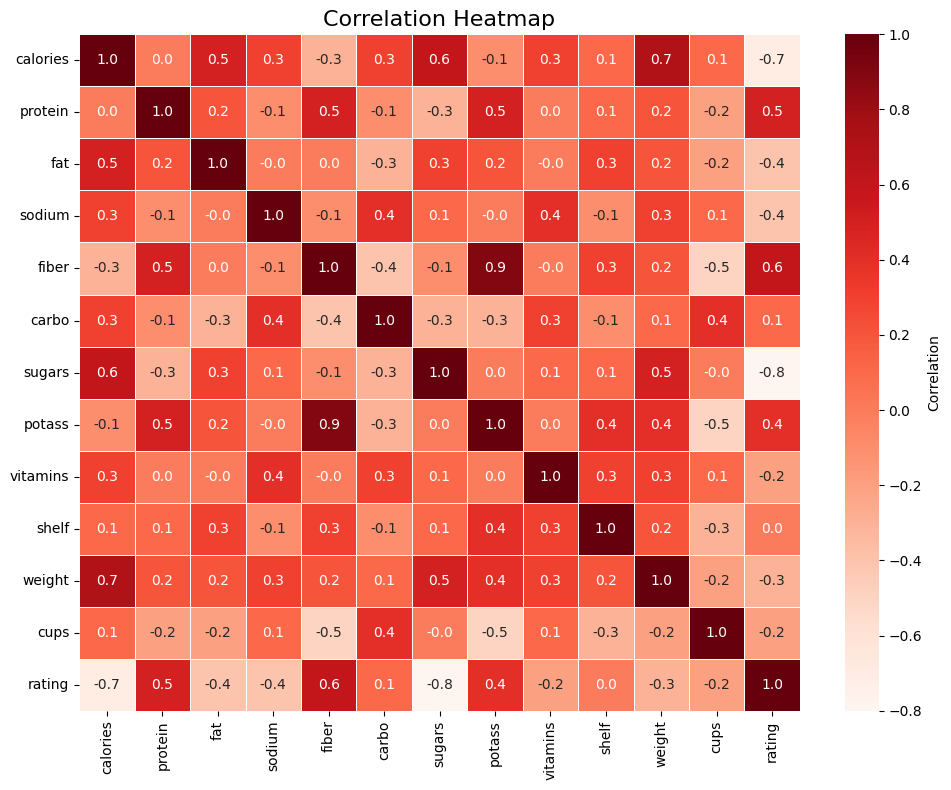

In [18]:
# 1.Numeric column selection
df_is_numeric = df.select_dtypes(include=[np.number])

# 2.Calculate the correlation
df_heatmap = df_is_numeric.corr().round(1)

# 3.Change to long format for visualization
df_heatmap_melted = df_heatmap.reset_index().melt(id_vars='index')
df_heatmap_melted.columns = ['X1', 'X2', 'value']

# 4.Visualisasi Heatmap dengan seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_heatmap,
    annot=True,
    cmap="Reds",
    fmt=".1f",
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)

# 5.Add title and label
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

There seems to be a very strong correlation between the fiber and potassium content of cereals (90%). Weight is also positively correlated with calories, which makes sense because in physics, mass equals energy, but not all of the energy from food (in this case, cereal) can be digested so the correlation is not perfect.

## 3.2 Look at the Specific Correlations in the Ranking Column

<ipython-input-19-0ec4f528de0e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-0ec4f528de0e>:14: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


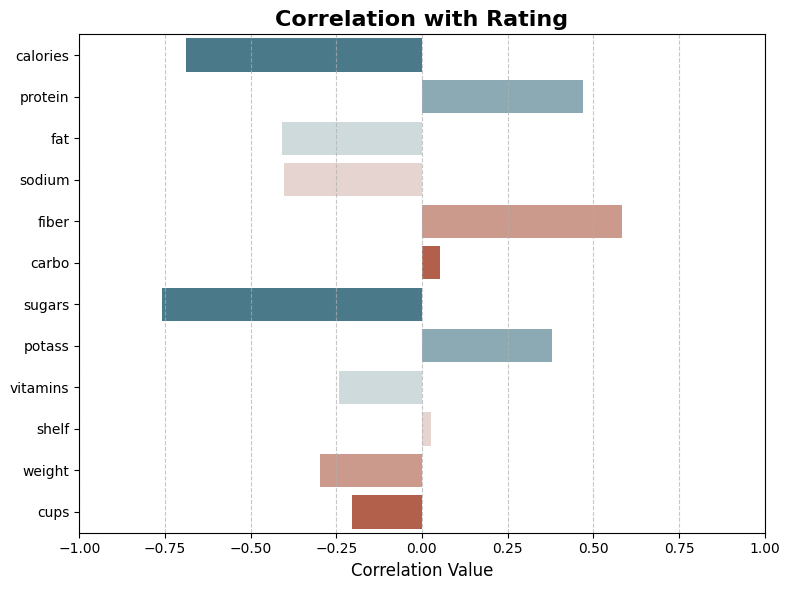

In [19]:
# 1.Numeric column selection
df_is_numeric = df.select_dtypes(include=[np.number])

# 2.Calculate the correlation
df_correlation = df_is_numeric.corr()

# 3.Take the correlation against the 'rating' column, except for correlation 1
df_ratcorr = df_correlation[['rating']].reset_index()
df_ratcorr = df_ratcorr[df_ratcorr['rating'] != 1]
df_ratcorr.columns = ['id', 'rating']

# 4.Visualization of correlation with ratings
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_ratcorr,
    x='rating',
    y='id',
    palette=sns.diverging_palette(220, 20, as_cmap=False), # Change as_cmap to False
    orient='h'
)

# 5.Add limit, label, dan format
plt.xlim(-1, 1)
plt.title("Correlation with Rating", fontsize=16, weight='bold')
plt.xlabel("Correlation Value", fontsize=12)
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

There is no strong positive correlation between cereal ratings and ingredients. The largest positive correlation value is only 0.58. Meanwhile, there are two strong negative correlations that contribute to cereal ratings, sugar and calories, which have correlation values ​​of -0.76 and -0.69 respectively.

## 3.3 Calories and Sugar Have A Fairly Negative Correlation With Rankings

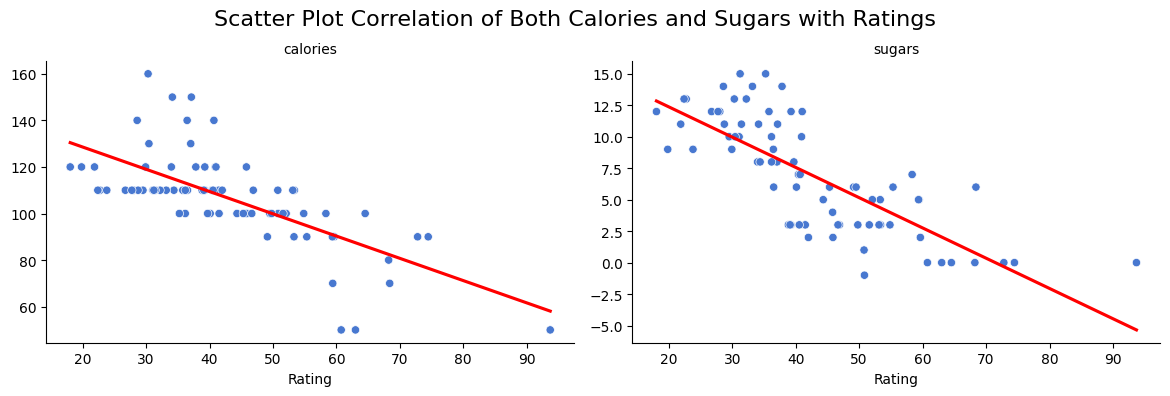

In [20]:
# 1.Select the 'rating', 'calories', and 'sugars' columns.
df_calcor = pd.melt(df[['rating', 'calories', 'sugars']], id_vars='rating', var_name='variable', value_name='value')

# 2.Visualizing scatter plot with facets using seaborn
g = sns.FacetGrid(df_calcor, col="variable", sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x="rating", y="value", hue="variable", palette="muted", legend=False)
g.map_dataframe(sns.regplot, x="rating", y="value", scatter=False, color="red", ci=None)

# 3.Add labels and titles
g.set_axis_labels("Rating", "")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Scatter Plot Correlation of Both Calories and Sugars with Ratings", fontsize=16)

plt.show()

A cereal's ranking seems to decrease as its calories and sugar content increases.

## 3.4 Manufacturers Ranked by Average Sugar In Their Products

<ipython-input-21-e05c15714614>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('mfr')['sugars']
<ipython-input-21-e05c15714614>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


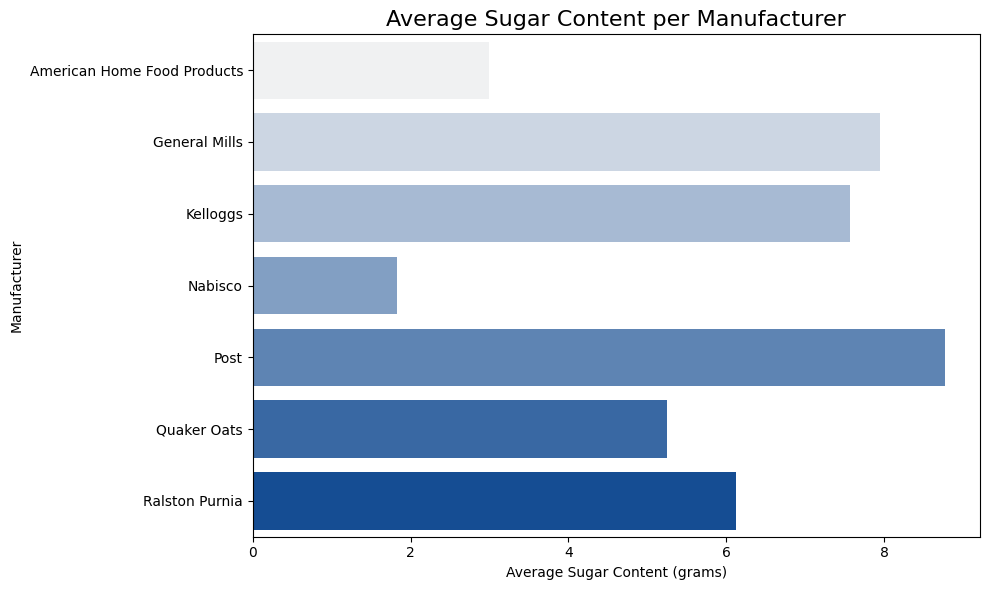

In [21]:
# 1.Group data by 'mfr' and calculate average 'sugars'
mfr_sugar = (
    df.groupby('mfr')['sugars']
    .mean()
    .reset_index()
    .rename(columns={'sugars': 'Average Sugar Content (grams)'})
    .sort_values('Average Sugar Content (grams)', ascending=False)  # Sort by highest to lowest
)

# 2.Visualize bar plot, sorted by highest sugar content
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mfr_sugar,
    x='Average Sugar Content (grams)',
    y='mfr',
    palette=sns.light_palette("#004BA8", n_colors=len(mfr_sugar))
)

# 3.Add labels
plt.title("Average Sugar Content per Manufacturer", fontsize=16)
plt.xlabel("Average Sugar Content (grams)")
plt.ylabel("Manufacturer")
plt.tight_layout()

plt.show()

The difference between the manufacturers with the lowest and highest average sugar content in their products is astounding. Be especially wary of their products with the highest sugar content when purchasing cereals from Post, General Mills and Kellogg.

## 3.5 Top 10 Cereals With The Highest Sugar Content

<ipython-input-22-b278fc2255cf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-22-b278fc2255cf>:9: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


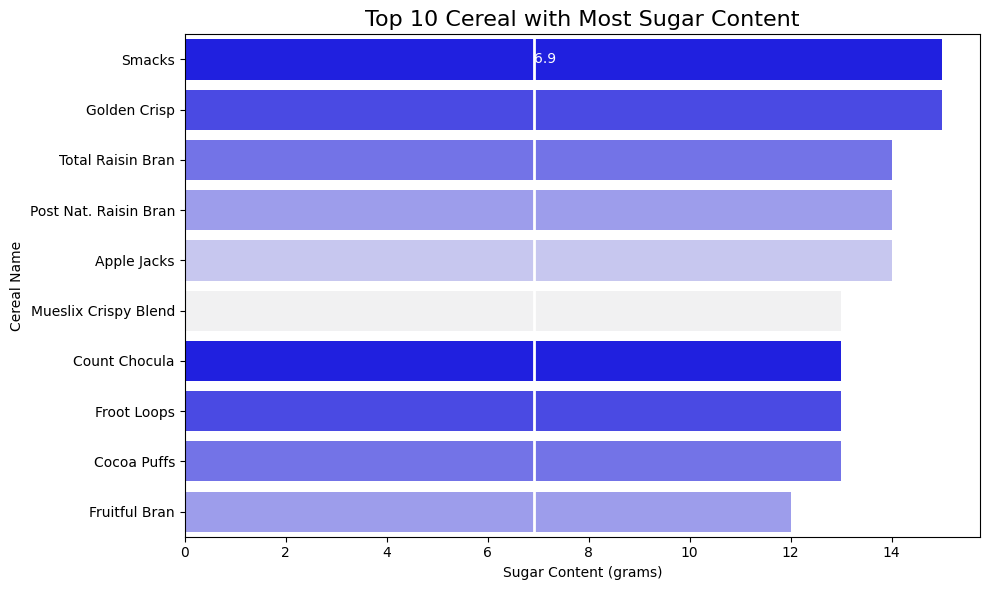

In [22]:
# 1.Sort data by 'sugars' and select top 10 cereals
sugar_highest = df[['name', 'sugars']].sort_values(by='sugars', ascending=False).head(10)

# 2.Calculate mean sugar content
mean_sugar = df['sugars'].mean()

# 3.Visualize bar plot with blue color
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sugar_highest,
    x='sugars',
    y='name',
    palette=sns.light_palette("blue", reverse=True)  # Updated to blue shades
)

# 4.Add horizontal line for mean sugar content
plt.axvline(x=mean_sugar, color='white', linewidth=2)

# 5.Add mean value label
plt.text(mean_sugar, 0, f'{mean_sugar:.1f}', color='white', va='center', ha='left')

# 6.Add title and labels
plt.title("Top 10 Cereal with Most Sugar Content", fontsize=16)
plt.xlabel("Sugar Content (grams)")
plt.ylabel("Cereal Name")

plt.tight_layout()
plt.show()

This cereal product has a sugar content that exceeds the average cereal (6.9 grams) by 3-10 grams or 60-200%. This is a very surprising fact and I think we should avoid eating this cereal. However, there are brands of cereal without sugar conten

In [23]:
# Filter the dataframe to select rows where 'sugars' is 0
w_o_sugar = df[df['sugars'] == 0][['name', 'sugars']]

for name in w_o_sugar['name']:
    print(name)

All-Bran with Extra Fiber
Cream of Wheat (Quick)
Puffed Rice
Puffed Wheat
Shredded Wheat
Shredded Wheat 'n'Bran
Shredded Wheat spoon size


## 3.6 Top 10 Cerelas Ratings Given by Consumers

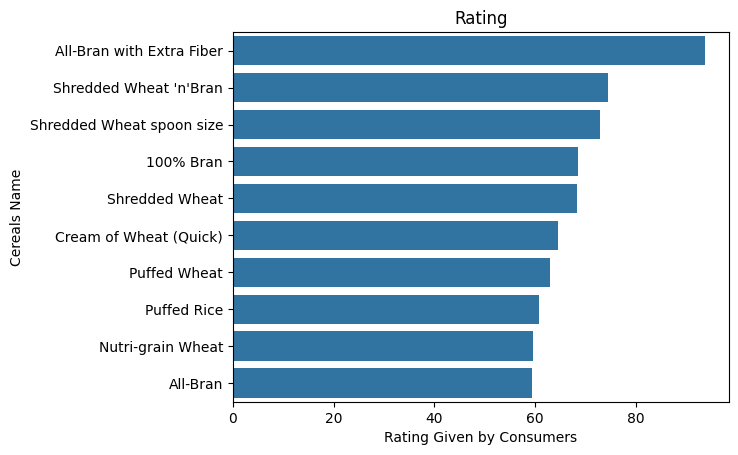

In [24]:
# Show the ratings given by consumers
ax = sns.barplot(x="rating", y="name", data=df.sort_values('rating',ascending=False)[:10])
_ = ax.set(xlabel='Rating Given by Consumers', ylabel='Cereals Name',title = "Rating")

All-Bran with Extra Fiber is the highest ratings given by consumers

## 3.7 Bottom 10 Cerelas Ratings Given by Consumers

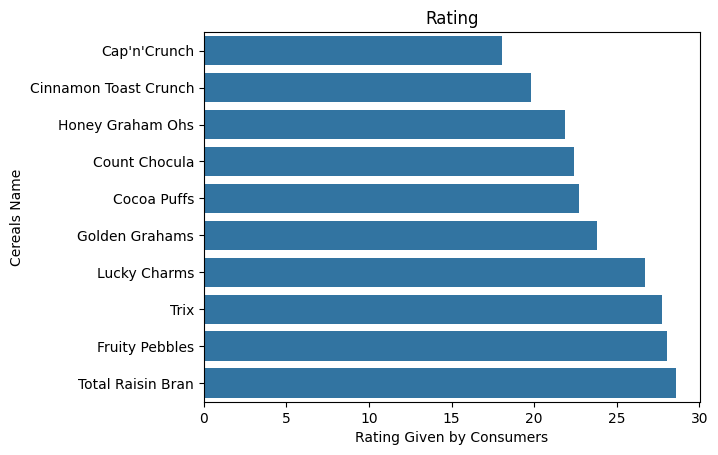

In [28]:
# Show the ratings given by consumers.
ax = sns.barplot(x="rating", y="name", data=df.sort_values('rating',ascending=True)[:10]) # Changed 'sorxt_values' to 'sort_values'
_ = ax.set(xlabel='Rating Given by Consumers', ylabel='Cereals Name',title = "Rating")

Cup'n'Crunch is the number is the lowest ratings given by consumers

## 3.8 Distribution Different Nutrients

array([[<Axes: title={'center': 'protein'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'fat'}>],
       [<Axes: title={'center': 'sodium'}>,
        <Axes: title={'center': 'fiber'}>,
        <Axes: title={'center': 'carbo'}>],
       [<Axes: title={'center': 'sugars'}>,
        <Axes: title={'center': 'potass'}>,
        <Axes: title={'center': 'vitamins'}>]], dtype=object)

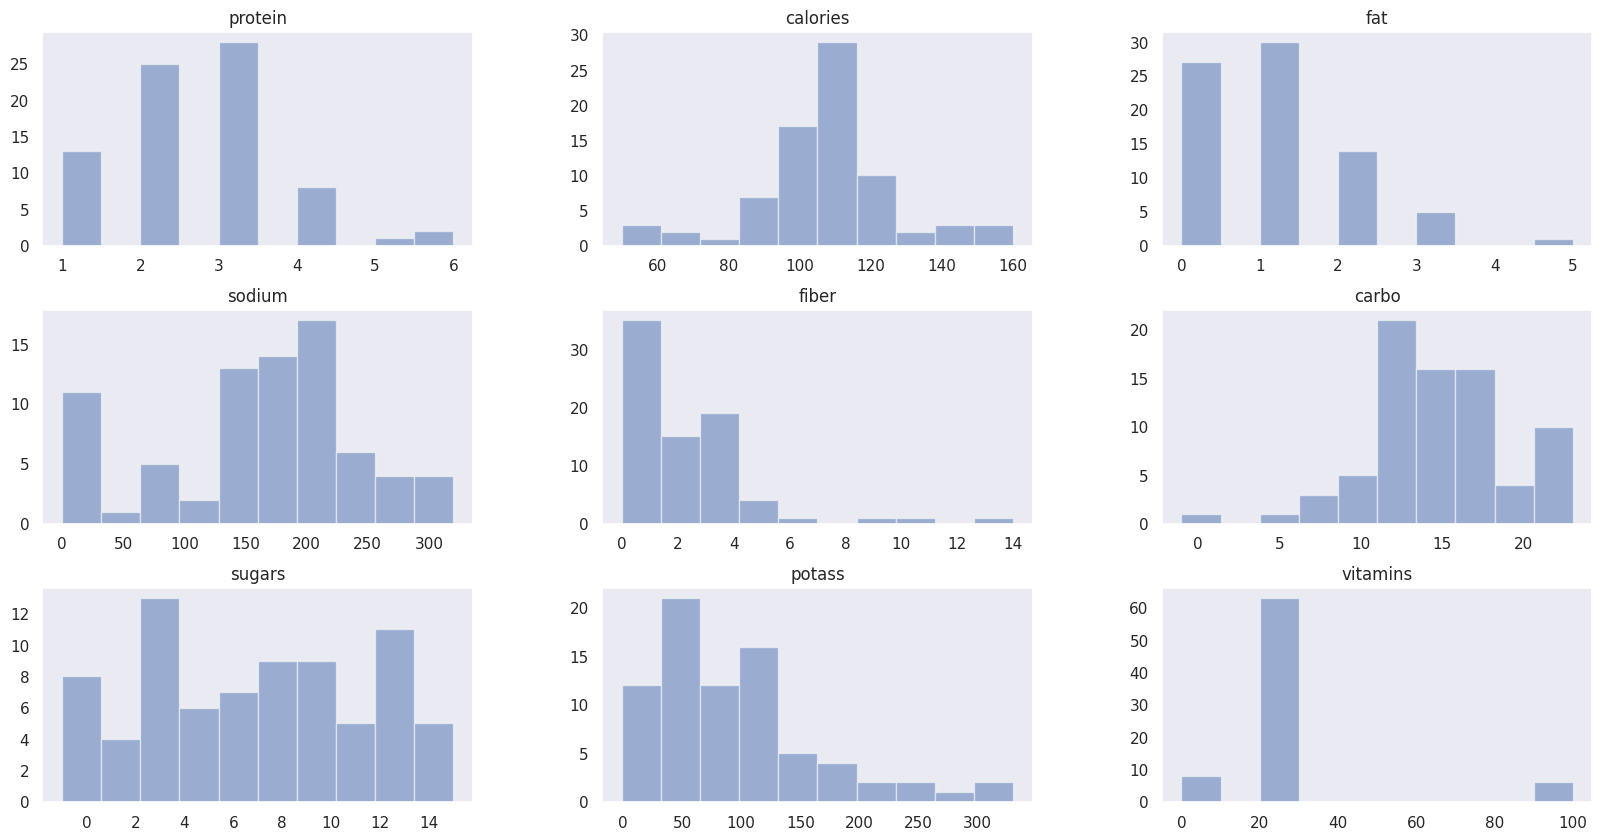

In [29]:
sns.set(font_scale = 1)
df[['protein','calories','fat','sodium','fiber','carbo','sugars','potass','vitamins']].hist(grid=False, alpha=0.5,figsize=(20,10))

<ipython-input-30-d8beeb587444>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["calories"], ax=axes[0,0])
<ipython-input-30-d8beeb587444>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df["protein"], ax=axes[0,1]).set(ylabel=None)
<ipython-input-30-d8beeb587444>:6: UserWarning: 

`distp

[Text(0, 0.5, '')]

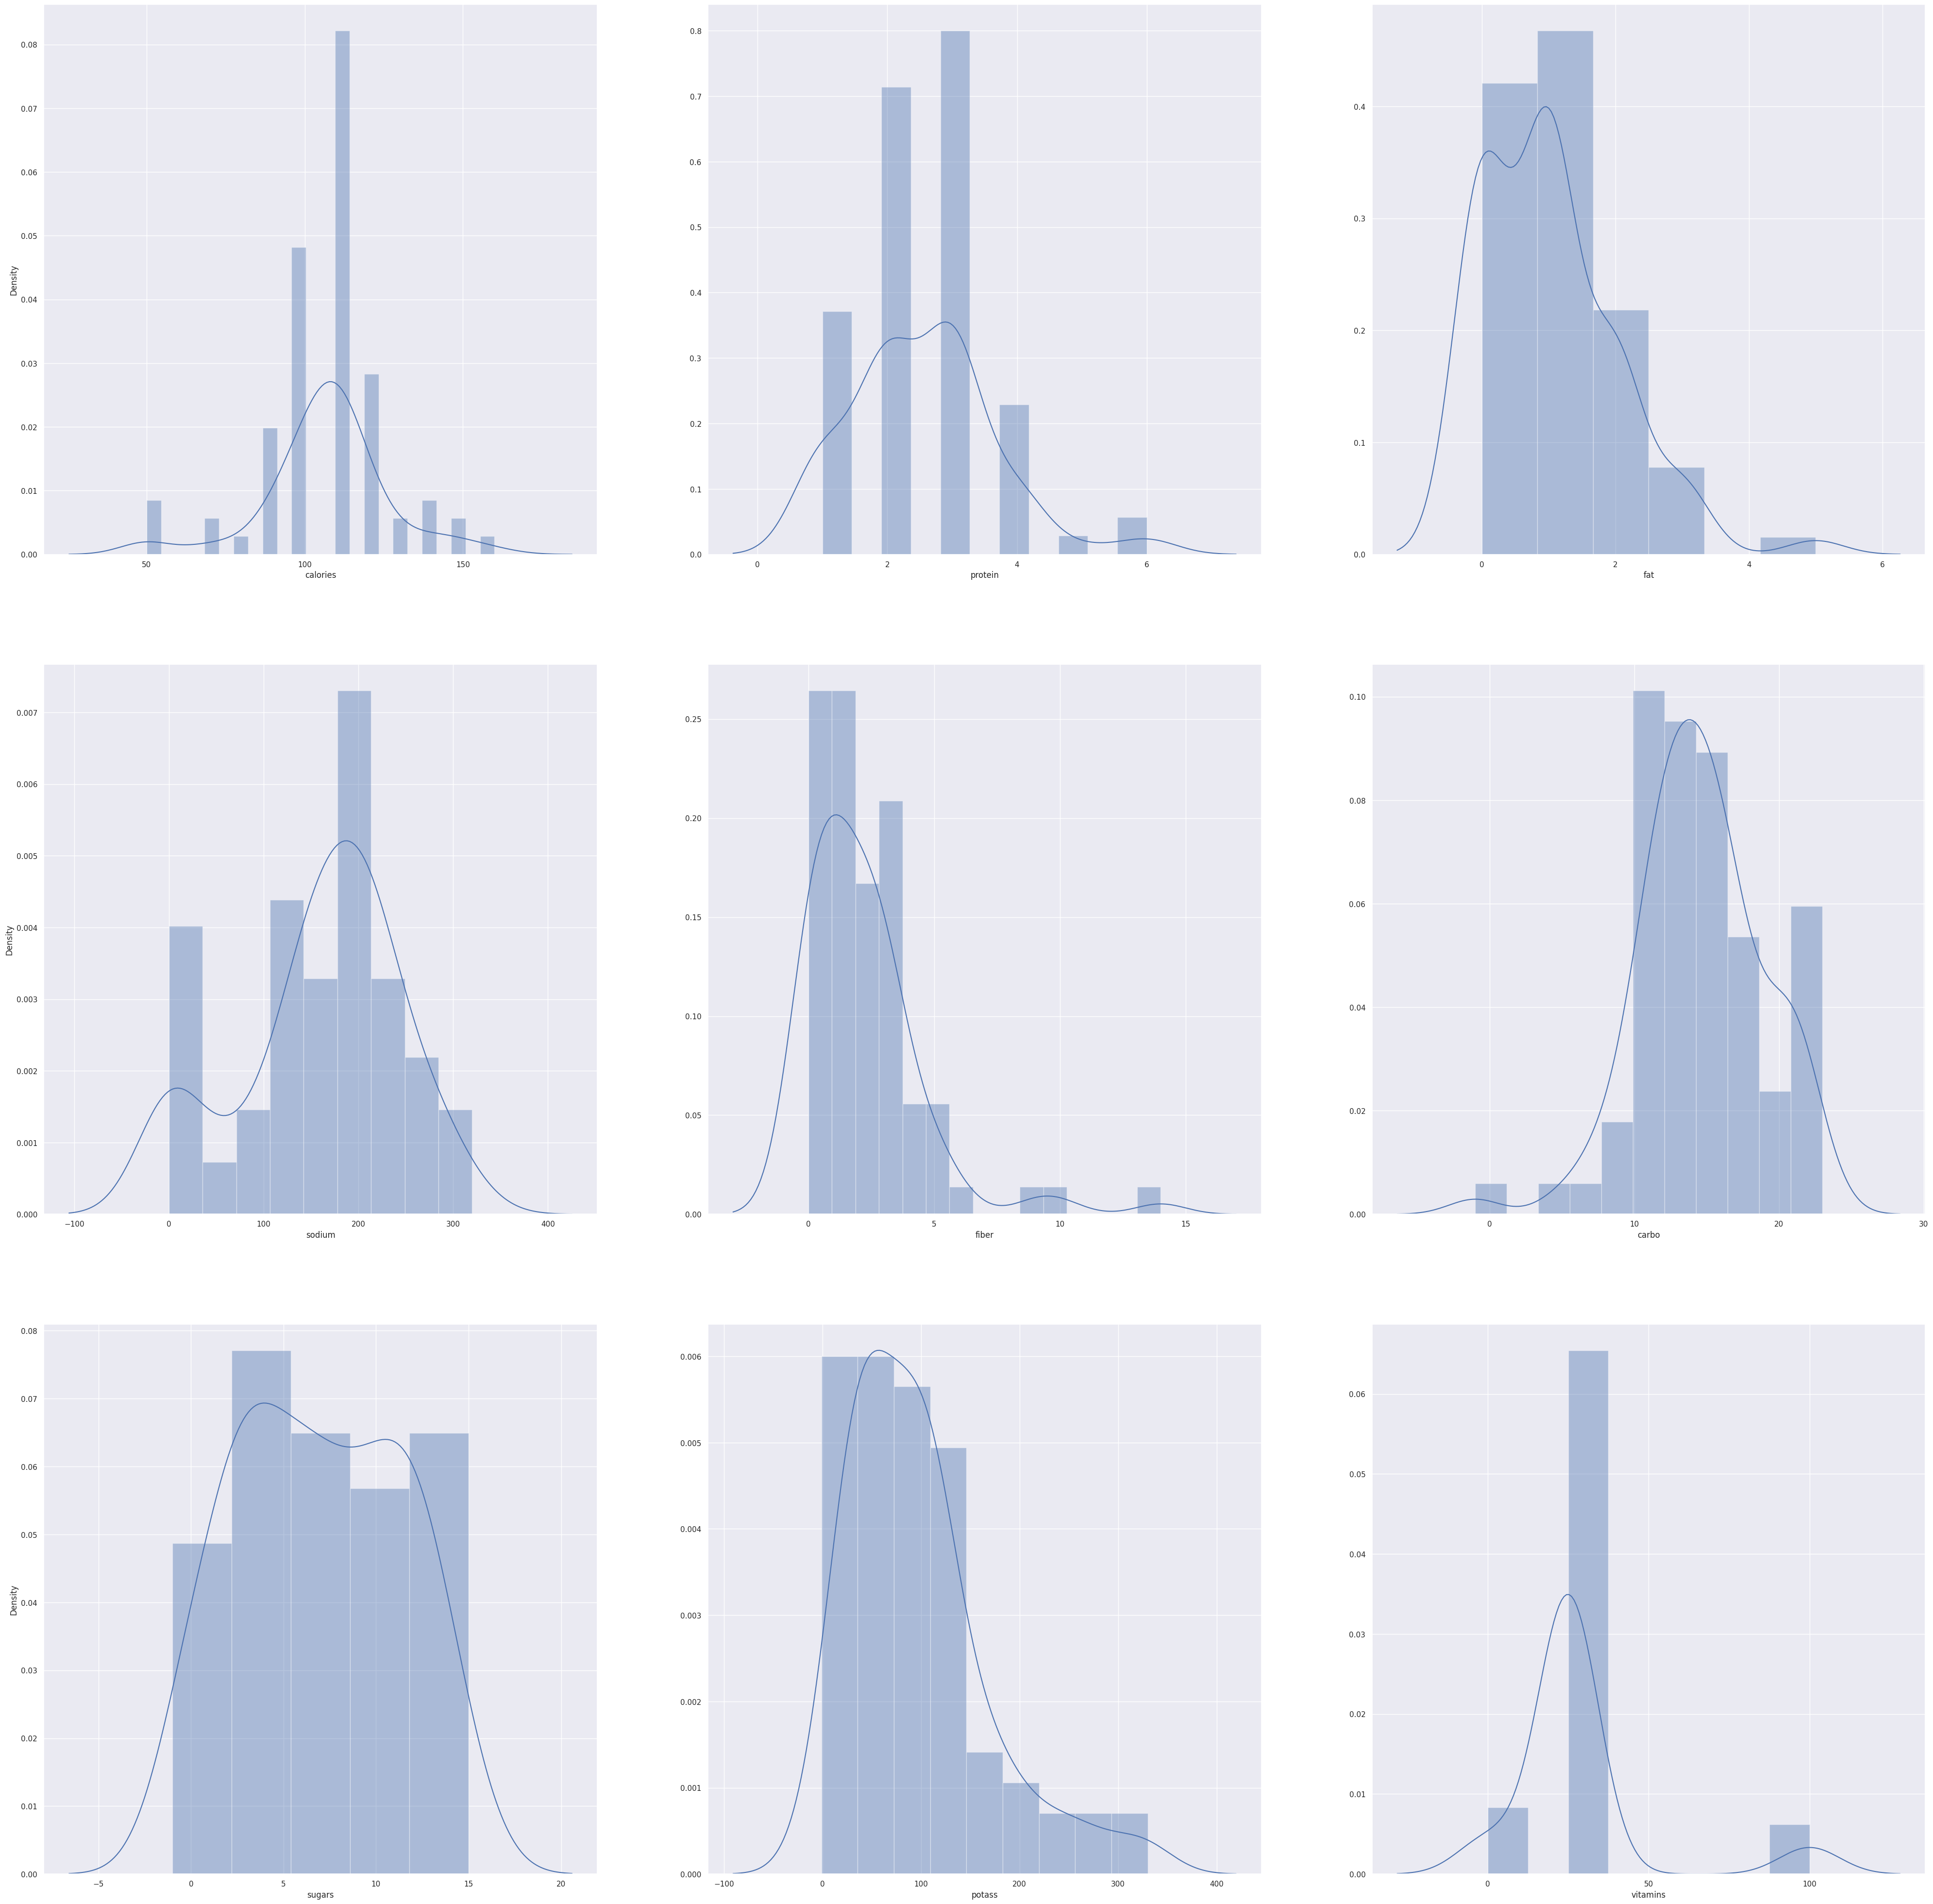

In [30]:
# Display the histogram to understand the data
f, axes = plt.subplots(3,3, figsize=(50,50))
sns.set(font_scale = 4)
sns.distplot( df["calories"], ax=axes[0,0])
sns.distplot( df["protein"], ax=axes[0,1]).set(ylabel=None)
sns.distplot( df["fat"], ax=axes[0,2]).set(ylabel=None)
sns.distplot( df["sodium"], ax=axes[1,0])
sns.distplot( df["fiber"], ax=axes[1,1]).set(ylabel=None)
sns.distplot( df["carbo"], ax=axes[1,2]).set(ylabel=None)
sns.distplot( df["sugars"], ax=axes[2,0])
sns.distplot( df["potass"], ax=axes[2,1]).set(ylabel=None)
sns.distplot( df["vitamins"], ax=axes[2,2]).set(ylabel=None)

# 4.SUMMARY

## 4.1Summary Statistics

- Number of cereals : 77
- Number of manufacturers : 7
- Number of types : 2 (Cold, Hot)

## 4.2 Nutritional Averages

- Nutritional Averages
- Calories: 106.88
- Protein: 2.55 grams
- Fat: 1.01 grams
- Sodium: 159.68 mg
- Fiber: 2.15 grams
- Carbohydrates: 14.60 grams
- Sugars: 6.92 grams
- Potassium: 96.08 mg
- Vitamins: 28.25% of daily value

## 4.3 Ratings

- Average Rating: 42.67
- Min Rating: 18.04
- Max Rating: 93.70

# 5.INSIGHT & RECOMMENDATION

## 5.1 Insight

- There is a strong correlation between fiber and potassium content in cereals (90%), and a positive correlation between weight and calories, although not perfect.
- There is no significant correlation between cereal ratings and ingredients, except for sugar and calorie content, which have a strong negative correlation with ratings (-0.76 and -0.69).
- The higher the sugar and calorie content, the lower the cereal rating. The difference in average sugar content across manufacturers is striking, especially among Post, General Mills, and Kellogg's products, which have significantly above-average sugar content (6.9 grams).
- In addition, All-Bran with Extra Fiber has the highest rating, while Cup'n'Crunch has the lowest rating.

## 5.2 Recommendation

- **Promote healthy products :** Focus on high-fiber, low-sugar products to increase consumer appeal.
- **Consumer education :** Provide transparent nutritional information, especially for high-sugar products, and encourage consumption of highly rated products such as All-Bran with Extra Fiber.
- **Product diversification :** Develop low-sugar and low-calorie cereals to appeal to a more health-conscious market.
- **Branding strategy :** Pay attention to consumer perceptions of manufacturers such as Post, General Mills, and Kellogg, and take steps to improve the nutritional quality of their products.
- **Pricing :** Use consumer rating data to competitively price premium products such as All-Bran with Extra Fiber to make them more affordable.